## Fraud Detection
#### A model that predicts whether a given transaction is fraudulent
#### Unknown feature names
    The model will be evaluated using the area under the ROC curve
    ROC takes into consideration both True Positives (ideally 1) and False Negatives (ideally 0). As these are the metrics that are to be optimized (TP) and minimized (FP), the ROC is the most suitable metric. Had resampled data not be used, the ROC would not have been as effective. In this case, replace the x-axis (1 - specificity) with Precision (TP/ TP + FP), because precision does not include the number of True Negatives in its calculation, and is not affected by the imbalance.
    
    The desired metric for model selection and evaluation is recall ratio, which indicates the ratio of true positive. Thus, the ability of classifier to identify fraudulent transaction would be measured by performance in recall ratio and ROC.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

**Load Data**

In [40]:
sample = pd.read_csv('D://Jessey//Desktop//sample.csv')
sample

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-0.247824,6.425853,-6.485658,-8.241462,NaN,0.03%,Tuesday,-9.808905,4.753455,2.537819,...,0.592543,14.967527,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,0.02%,Wednesday,10.710053,1.608882,-2.027541,...,-1.712788,-3.638637,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,-0.0%,Tuesday,-3.364649,-2.493473,1.429913,...,2.206956,7.292558,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,0.0%,Thurday,-6.111982,-1.796377,-3.169510,...,-3.841669,5.189840,10.291069,-3.642396,0.674300,-1.104317,-3.922342,-0.613947,7.275179,0
4,0.750715,15.656095,-6.778600,11.251037,-0.308200,0.0%,Wednesday,2.498892,-0.323229,-2.624680,...,8.933781,-7.295794,-11.246059,-4.876594,3.395415,-2.646844,-5.273267,-5.259536,-3.240523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.664967,-3.427965,-5.143886,0.289251,-3.202695,0.01%,Tuesday,-13.356218,0.244953,-2.524016,...,2.123462,6.139848,-4.323045,-6.453976,6.345870,6.482477,-11.562510,4.216840,5.689256,0
7996,2.174302,-4.912113,-4.803975,-22.081911,NaN,0.0%,Tuesday,-0.266593,-1.743051,5.870177,...,-12.307131,-4.762671,10.574798,-3.954958,0.998331,9.001036,1.171144,-1.001999,9.383899,0
7997,2.247079,-3.377818,-1.567924,-7.445187,-0.677291,-0.01%,Wednesday,6.618001,2.323299,3.724704,...,-8.084817,8.031024,7.282587,2.439789,1.666460,0.566402,3.591239,2.962485,0.980093,0
7998,-1.402385,-20.117766,3.705099,11.634801,0.680733,-0.0%,Tuesday,-4.304220,-1.730289,-12.788627,...,4.920424,-0.954106,6.261179,0.628781,-0.109908,2.086040,12.889705,7.359320,0.124861,0


In [41]:
sample[sample['y']== 1]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
23,-1.582122,14.950878,-5.975168,-24.924315,-2.170571,0.01%,Tuesday,4.424373,0.209202,-6.491850,...,-7.050792,-9.967707,5.744598,-4.698793,1.980553,4.170966,0.730302,-2.909570,-10.590043,1
28,2.188746,0.563793,12.725221,-4.107528,0.477985,0.01%,Wednesday,6.490210,-2.388224,1.869131,...,-4.644866,24.126628,1.360700,4.001760,1.888121,-0.118743,-6.242055,-2.676678,-1.218922,1
77,-1.086471,-2.729742,-6.028545,7.614471,-0.605442,0.01%,Thurday,-10.823303,-0.943962,-5.890023,...,4.966653,10.750593,10.420992,-7.444184,-5.609769,4.013456,-0.028463,4.482840,-17.090602,1
98,-1.565459,2.610581,10.282135,15.572457,-1.080135,-0.01%,Wednesday,-7.266203,-1.778145,0.778328,...,7.091654,-9.884330,-2.717783,0.869940,-0.244029,1.939866,-1.646229,-0.569443,-2.134166,1
102,-5.353437,17.070565,-0.586751,-9.194219,1.789374,-0.01%,Wednesday,3.710446,-1.139378,1.516376,...,5.368424,7.286388,7.802404,4.572457,-0.831698,-18.373443,6.949627,0.666733,-8.644061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,NaN,0.407311,0.677172,11.298661,0.310543,-0.01%,Wednesday,-10.862823,-2.161845,-5.895619,...,1.762727,-9.359971,-2.709964,7.020470,-3.658328,9.258640,-2.362314,1.068227,-1.991397,1
7977,-0.053082,4.649924,4.155413,8.532834,0.664992,0.01%,Wednesday,-1.478844,-0.889747,1.463910,...,6.188368,-7.225495,-14.509758,-0.352962,0.076488,2.675574,-11.994999,-2.071973,-0.871759,1
7980,2.236687,11.599733,2.529209,6.959733,0.370439,0.01%,Tuesday,-2.160740,-0.711607,-4.588757,...,-4.250002,2.430729,-5.989164,2.024963,-0.372693,-5.545353,4.186663,-4.513655,-6.183959,1
7983,-3.485648,2.833296,9.539867,7.604092,0.627461,0.01%,Tuesday,-2.022546,2.683785,-1.573812,...,0.897178,6.751905,-15.567607,-6.036208,-4.685870,-18.791414,NaN,2.985958,1.237103,1


**According to 'y', labels of dataset is so imbalanced**

In [42]:
label = sample['y']

## 1. Explore Data Analysis

In [43]:
sample.shape

(8000, 101)

In [44]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 6.2+ MB


**Observation**
- There are 95 numerical columns.
- There are 6 categorical columns.

**Check the object columns**

In [45]:
sample.dtypes[sample.dtypes=='object']

x5     object
x6     object
x20    object
x27    object
x49    object
x57    object
dtype: object

In [46]:
sample[['x5','x6','x20','x27','x49','x57']]

,x5,x6,x20,x27,x49,x57
0,0.03%,Tuesday,Aug,Afternoon,False,$1578.34
1,0.02%,Wednesday,Jul,Afternoon,False,$767.76
2,-0.0%,Tuesday,Aug,Evening,False,$931.06
3,0.0%,Thurday,Aug,Afternoon,True,$2124.52
4,0.0%,Wednesday,Jul,Evening,False,$-3055.67
...,...,...,...,...,...,...
7995,0.01%,Tuesday,Jun,Afternoon,False,$-1664.04
7996,0.0%,Tuesday,May,Afternoon,False,$-42.81
7997,-0.01%,Wednesday,Aug,Afternoon,True,$220.59
7998,-0.0%,Tuesday,Aug,Evening,True,$467.47


In [47]:
sample['x5'].value_counts()

0.01%     1929
-0.01%    1881
0.0%      1531
-0.0%     1514
0.02%      479
-0.02%     462
-0.03%      60
0.03%       48
0.04%        1
-0.04%       1
Name: x5, dtype: int64

**Observation**
- `Columns **x57**` is a dollar value columns. The '$' will be removed and the column will be converted to numerical continuious data.
 - `Columns **x5**` only contains serveral values from 0.04% to -0.04%. It will be handled first based on categorical data and then, converted to numerical. 
 - For other columns, they will be treated as categorical values.

**Check the numerical columns**

In [48]:
sample.drop(['x5','x6','x20','x27','x49','x57'],axis =1).describe()

,x0,x1,x2,x3,x4,x7,x8,x9,x10,x11,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,7916.000000,7924.000000,7926.000000,7934.000000,7919.000000,7909.000000,7921.000000,7914.000000,7911.000000,7925.000000,...,7913.000000,7907.000000,7903.000000,7930.000000,7930.000000,7913.000000,7914.000000,7923.000000,7923.000000,8000.000000
mean,0.060228,0.407989,0.054322,-0.023308,-0.004516,0.005298,0.006460,0.054020,0.082194,-0.162486,...,-0.010624,-0.093474,0.062183,0.043515,0.555696,0.097914,-0.094866,-0.031607,-0.107921,0.054875
std,4.114402,14.047469,7.335695,8.744338,1.495770,7.825992,2.060713,4.808131,6.090958,9.637473,...,7.680308,9.936610,8.800644,4.431941,1.693398,7.904771,6.806242,6.272912,6.345949,0.227750
min,-18.252266,-42.459763,-27.966393,-31.413403,-5.185877,-30.006046,-9.744478,-17.118829,-23.412152,-36.495817,...,-27.810191,-33.876898,-30.762278,-16.942654,-6.503762,-28.708333,-27.631360,-22.814032,-24.159002,0.000000
25%,-2.708436,-9.746864,-5.018364,-5.904680,-1.001892,-5.332021,-1.388365,-3.206162,-3.979275,-6.673348,...,-5.113941,-6.814237,-5.947130,-2.927609,-0.526532,-5.396910,-4.492095,-4.199087,-4.362669,0.000000
50%,0.042683,-0.831805,0.008158,-0.036743,0.008718,-0.012167,-0.000204,0.127904,0.156267,-0.113515,...,0.042126,-0.237591,0.193627,0.054766,0.572391,0.110662,-0.051194,0.018044,-0.079668,0.000000
75%,2.870351,9.498792,4.911921,5.851433,0.987828,5.288608,1.337205,3.390917,4.180005,6.322518,...,5.200893,6.551684,6.163712,3.033703,1.701990,5.569025,4.509073,4.161221,4.231148,0.000000
max,16.464349,58.037828,27.964211,29.580564,6.404181,25.619078,7.797751,16.574194,20.708372,34.389640,...,29.811154,36.301709,29.069874,18.347966,6.474684,29.928906,24.533676,23.643567,23.816776,1.000000


**Observation:**We can see these numerical columns, the value are well distributed around mean.

**Check Missing Value**

In [49]:
sample.isnull().sum()/sample.isnull().count()

x0     0.010500
x1     0.009500
x2     0.009250
x3     0.008250
x4     0.010125
         ...   
x96    0.010875
x97    0.010750
x98    0.009625
x99    0.009625
y      0.000000
Length: 101, dtype: float64

In [50]:
(sample.isnull().sum()/sample.isnull().count()).max()

0.0125

In [51]:
sample['y'].isnull().sum()

0

<AxesSubplot:>

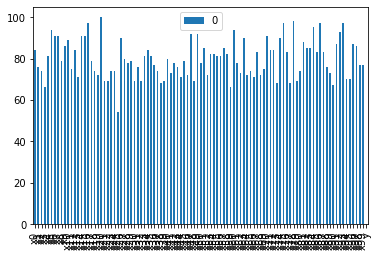

In [52]:
pd.DataFrame(sample.isnull().sum()).plot(kind = 'bar')

**Obeservation**: 
1. The result length is 101, means except for label y, all columns have missing value. There for it is impossible to drop rows of missing value, it will drop all rows. 

2. But, the missing value of each column are not very much, the highest percentage missing value is only `1.25%`. And also, the missing value qty in each column are very close around 80 or 1%.

3. There for will have fill empty fields with some value.

**Decision:**  We are going to fill categorical with the most frequent value and the numerical fields with the mean.

## 2. Split Data

There are 2 ways to split the data:
1. Split the data in to train, validation and test data. 
      - pro: Avoid any data leakage.
      - con: More complicated and take more time.
2. Only split data into two parts: train and test.
      - pro: easy and quick
      - con: when fill the missing value with mean, this will cause data leakage when validate the model.

**Decision:** we will use the second way. Also this may cause the data leakage, but only 1% data leakage of a column impact will slim on the entire model.

In [53]:
sample_train, sample_test, label_train, label_test = train_test_split(sample.drop(columns='y'), label, test_size=0.20, random_state=42)

## 3. Data Wrangling

*Both sample_train and sample_test will be handle together

**3.1 Change column x57 into numerical**

In [54]:
datasets = [sample_train, sample_test]

for d in datasets:
    d['x57'] = d['x57'].str.lstrip('$').astype(float)
    #d['x57'].str.split('$').str[1].astype('float') ##- alternative code

**3.2 fill the categorical columns ('x5','x6','x20','x27','x49') with the most frequent value**

In [55]:
datasets = [sample_train, sample_test]

for d in datasets:
    for cl in ['x5','x6','x20','x27','x49']:
        d[cl]= d[cl].fillna(d[cl].mode()[0],axis=0)       

**3.3 Convert 'x5' and 'x49' to Numerical**

In [56]:
datasets = [sample_train, sample_test]

for d in datasets:
    d['x5'] = d['x5'].str.rstrip('%').apply(float)/100

In [57]:
datasets = [sample_train, sample_test]

for d in datasets:
    d['x49'] = d['x49'].astype(int)

**3.3 fill missing value in other numerical columns  with mean**

In [58]:
datasets = [sample_train, sample_test]
cateforical_cols = ['x5','x6','x20','x27','x49']
nuclist = list(sample_train.columns)
for df in datasets:
    for cl in nuclist:
        if cl not in cateforical_cols:
            df[cl] = df[cl].fillna(df[cl].mean(),axis=0)

**Check missing values**

In [59]:
datasets = [sample_train, sample_test]

for df in datasets:
    print(df.isnull().sum().sum())

0
0


The missing value in columns has been filled

**3.4 Enclode Categorical features and Get X_train,X_test**

In [60]:
X_train = pd.get_dummies(sample_train, drop_first=True)
X_test = pd.get_dummies(sample_test, drop_first=True)

In [61]:
y_train = label_train
y_test = label_test

In [62]:
print(X_train.info(),X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 1467 to 7270
Columns: 115 entries, x0 to x27_Night
dtypes: float64(96), int32(1), uint8(18)
memory usage: 4.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 2215 to 6832
Columns: 115 entries, x0 to x27_Night
dtypes: float64(96), int32(1), uint8(18)
memory usage: 1.2 MB
None None


In [63]:
sample_train['x20']

1467     Jun
5768     Jul
5714    Sept
1578     May
6958     Aug
        ... 
5226     Jun
5390     May
860      Aug
7603     Jun
7270     Aug
Name: x20, Length: 6400, dtype: object

In [64]:
list(X_train.columns)[97:]

['x6_Monday',
 'x6_Thurday',
 'x6_Tuesday',
 'x6_Wednesday',
 'x20_Aug',
 'x20_Dec',
 'x20_Feb',
 'x20_Jan',
 'x20_Jul',
 'x20_Jun',
 'x20_Mar',
 'x20_May',
 'x20_Nov',
 'x20_Oct',
 'x20_Sept',
 'x27_Evening',
 'x27_Morning',
 'x27_Night']

## 4. Baseline Model

#### 4.1 Imbalance Handling

Let's check the value distribution of y:

<AxesSubplot:>

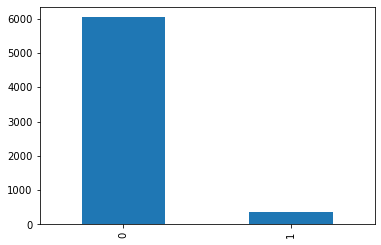

In [65]:
y_train.value_counts().plot(kind = 'bar')

- **Observation** The y value is distrubted very imbalanced.
- **Decision** Imbalanced data handling is needed.

In [66]:
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)
print(X_train_resampled.shape, y_train_resampled.shape,X_test_resampled.shape, y_test_resampled.shape)
pd.Series(y_train_resampled).value_counts()

(12080, 115) (12080,) (3042, 115) (3042,)


1    6040
0    6040
Name: y, dtype: int64

#### 4.2 Baseline Model

Since this is a fault detect system, we focus on the accuracy of detecting the fault case -- False Negative. Therefore the `recall` metric is very important in addtion to ROC.

In [68]:
basemodel = LogisticRegression()
basemodel.fit(X_train_resampled,y_train_resampled)
y_pred_resampled = basemodel.predict(X_test_resampled)

C:\Users\Jessey\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
print(classification_report(y_test_resampled,y_pred_resampled))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1521
           1       0.76      0.73      0.75      1521

    accuracy                           0.75      3042
   macro avg       0.75      0.75      0.75      3042
weighted avg       0.75      0.75      0.75      3042



**Observation**
- The **recall** score of baseline model is: **0.73**

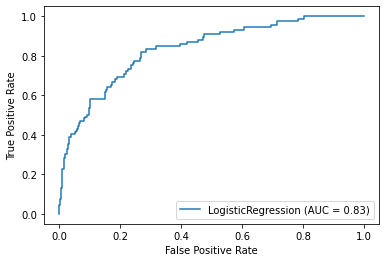

In [70]:
plot_roc_curve(basemodel, X_test_resampled,y_test_resampled)

In [71]:
roc_auc_score(y_test_resampled,y_pred_resampled)

0.7508218277449046

**Have not figure out why roc_auc_score makes different scores compared to AUC in the plot, but we use lower values as our AUC**

**Observation**
- The **recall** score of baseline model is: **0.73**
- The **AUC of ROC** baseline model is: **0.75**

We will start from this point to create model pipeliness

## 5. Models' Pipeline

We will first create model pipelineS based on sigle models since the bank is requiring a fast model for daily live operations, and normally a single machine learning model is faster than stacking models. 

#### 5.1 LogisticRegression

we have already done the model in baseline model, now we are using pipeline and GridSearch to fine tune the model.

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
grid_param = [{"logisticregression__C": np.logspace(0, 4, 10),
              "logisticregression__random_state":[42]}]

gridsearch = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression()),grid_param,cv=5,verbose=0)

lr = gridsearch.fit(X_train_resampled,y_train_resampled)


print(lr.best_estimator_)



C:\Users\Jessey\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Jessey\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=21.544346900318832, random_state=42))])


**The best model of LogisticRegression** 

The recall and ROC are:

In [74]:
y_lr_pred_resampled = lr.predict(X_test_resampled)
print(classification_report(y_test_resampled,y_lr_pred_resampled))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1521
           1       0.76      0.73      0.74      1521

    accuracy                           0.75      3042
   macro avg       0.75      0.75      0.75      3042
weighted avg       0.75      0.75      0.75      3042



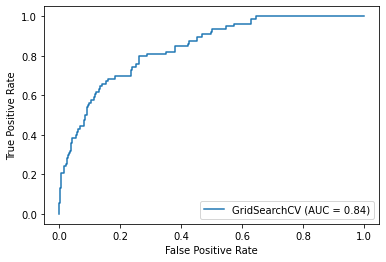

In [75]:
plot_roc_curve(lr,X_test_resampled,y_test_resampled)

In [76]:
roc_auc_score(y_test_resampled,y_lr_pred_resampled)

0.7458908612754768


**LogisticRegression Conclusion**

- The `recall` score is 0.73;
- The `roc_auc_score` is 0.745;

#### 5.2 RandomForest

In [438]:
grid_param = [{"n_estimators": [10,50,100],
               "max_depth":[5,8,15,30,None],
               "min_samples_leaf":[1,2,5,10,15],
               "max_leaf_nodes": [2, 5,10]}]

gridsearch = GridSearchCV(RandomForestClassifier(),grid_param,cv=5,verbose=0, n_jobs = -1)

best_model_rf = gridsearch.fit(X_train_resampled,y_train_resampled)


print(best_model_rf.best_estimator_)


RandomForestClassifier(max_depth=8, max_leaf_nodes=10, min_samples_leaf=10,
                       n_estimators=50)


**The best model of RadomForest**

The recall and ROC are:

In [471]:
y_rf_pred_resampled = best_model_rf.predict(X_test_resampled)
print(classification_report(y_test_resampled,y_rf_pred_resampled))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1521
           1       0.80      0.79      0.79      1521

    accuracy                           0.79      3042
   macro avg       0.79      0.79      0.79      3042
weighted avg       0.79      0.79      0.79      3042



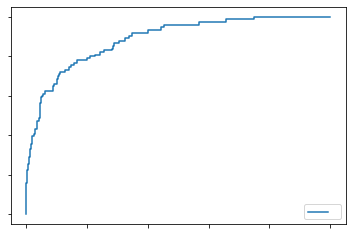

In [472]:
plot_roc_curve(best_model_rf,X_test_resampled,y_test_resampled)

In [473]:
roc_auc_score(y_test_resampled,y_rf_pred_resampled)

0.794543063773833

**RandomForest Conclusion**

- The `recall` score is 0.79;
- The `roc_auc_score` is 0.79;

#### 5.3 XGBClassifier

In [474]:
pipe = Pipeline([('scalar1',StandardScaler()),("classifier", XGBClassifier())])

estimators = [('xgb', XGBClassifier())]

grid_param = {'classifier__min_child_weight': [1, 5, 10],
              'classifier__gamma': [0.5, 1, 1.5, 2, 5],
              'classifier__subsample': [0.6, 0.8, 1.0],
              'classifier__colsample_bytree': [0.6, 0.8, 1.0],
              'classifier__max_depth': [3, 4, 5]
              }


gridsearch = GridSearchCV(pipe,grid_param,cv=5,verbose=0)

xgb = gridsearch.fit(X_train_resampled,y_train_resampled)


print(xgb.best_estimator_)


Pipeline(steps=[('scalar1', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.6, tree_method='exact',
                               validate_parameters=1, verbosity=None))])


**The best model of XGBoost** `ROC socre` and `recall`

The recall and ROC are:

In [475]:
y_xgb_pred_resampled = xgb.predict(X_test_resampled)
print(classification_report(y_test_resampled,y_xgb_pred_resampled))

              precision    recall  f1-score   support

           0       0.72      0.99      0.84      1521
           1       0.98      0.62      0.76      1521

    accuracy                           0.81      3042
   macro avg       0.85      0.81      0.80      3042
weighted avg       0.85      0.81      0.80      3042



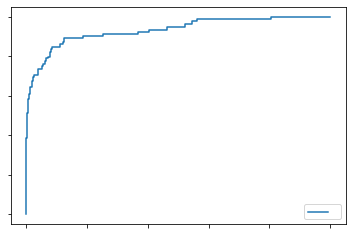

In [476]:
plot_roc_curve(xgb,X_test_resampled,y_test_resampled)

In [477]:
roc_auc_score(y_test_resampled,y_xgb_pred_resampled)

0.8057199211045365

**XGBoost Conclusion**

- The `recall` score is 0.62;
- The `roc_auc_score` is 0.81;

**Decision Tree (this model is added personally)- finding that DecisionTree model does not perform well**

In [78]:
pipe = Pipeline([('scalar1',StandardScaler()),('classifier', DecisionTreeClassifier())])

grid_param = {'classifier__criterion': ['gini','entrophy'],
              'classifier__max_depth': [5,10,15,20,30,40],
              'classifier__min_samples_split': [1,2,3,4,5,6,7],
              'classifier__min_samples_leaf':[1,2,3,4,5,6,7,8,9]
             }
gridsearch = GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1)
best_model_dt = gridsearch.fit(X_train_resampled,y_train_resampled)
print(best_model_dt.best_estimator_)

Pipeline(steps=[('scalar1', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=40, min_samples_split=6))])


In [79]:
y_pred_sampled = best_model_dt.predict(X_test_resampled)
print(classification_report(y_test_resampled,y_pred_sampled))

              precision    recall  f1-score   support

           0       0.61      0.96      0.75      1521
           1       0.91      0.38      0.54      1521

    accuracy                           0.67      3042
   macro avg       0.76      0.67      0.64      3042
weighted avg       0.76      0.67      0.64      3042



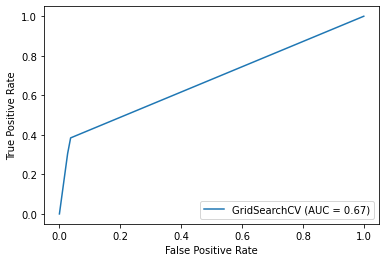

In [87]:
plot_roc_curve(best_model_dt, X_test_resampled,y_test_resampled)

In [88]:
roc_auc_score(y_test_resampled,y_pred_sampled)

0.6738987508218277

**DecisionTree Conclusion**

- The `recall` score is 0.38;
- The `roc_auc_score` is 0.67;

#### 5.4 Stacking Model - I do not add Decision Tree model to here becasue either its recall or ROC score are good. In order to have better score, we stack 3 models.

We collect the previous 3 best estimators together and stack them to get a mixed model, see the result.

In [489]:
estimators = [
    ('lr', LogisticRegression(C=21.544346900318832, random_state=42)),
    ('rf', RandomForestClassifier(max_depth=8, max_leaf_nodes=10, min_samples_leaf=10,
                       n_estimators=50)),
    ('xb', XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.6, tree_method='exact',
                               validate_parameters=1, verbosity=None)),

    
]

st_model = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier()
)

In [490]:
st_model.fit(X_train_resampled,y_train_resampled)

/Users/Ericzheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Ericzheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=21.544346900318832,
                                                   random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=8,
                                                       max_leaf_nodes=10,
                                                       min_samples_leaf=10,
                                                       n_estimators=50)),
                               ('xb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.6, gamma=0.5,
                                              gpu_id=-1, importance_type='gain',
                                              int...on_constraints='',
       

In [491]:
y_st_pred_resampled = st_model.predict(X_test_resampled)
print(classification_report(y_test_resampled,y_st_pred_resampled))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1521
           1       1.00      0.28      0.44      1521

    accuracy                           0.64      3042
   macro avg       0.79      0.64      0.59      3042
weighted avg       0.79      0.64      0.59      3042



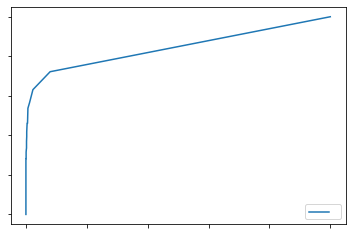

In [492]:
plot_roc_curve(st_model,X_test_resampled,y_test_resampled)

In [494]:
roc_auc_score(y_test_resampled,y_st_pred_resampled)

0.641025641025641

**Stacking Conclusion**

- The `recall` score is 0.28;
- The `roc_auc_score` is 0.64;

#### 5.5 Model Conclusion

Among the models, XGBoost Conclusion get the best score of roc_auc_score, but it gives low score of recall, and also, comparing the speed of RandomForest(40mins), LogisticRegression(5mins) XGBoost takes a couple of hours to get the result. Therefore, it is not suggested to use on production data.

**We recommend using RandomForest** as our best model for live data.

## 6. Model Pipeline

**STEP 1: Resample Data** 

In [ ]:
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

**STEP 2: Build Model** 

In [ ]:
grid_param = [{"n_estimators": [10,50,100],
               "max_depth":[5,8,15,30,None],
               "min_samples_leaf":[1,2,5,10,15],
               "max_leaf_nodes": [2, 5,10]}]

gridsearch = GridSearchCV(RandomForestClassifier(),grid_param,cv=5,verbose=0, n_jobs = -1)

**STEP 3: Train Model** 

In [ ]:
model= gridsearch.fit(X_train_resampled,y_train_resampled)

**STEP 4: Make Predict** 

In [ ]:
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test_resampled)

**STEP 5: Evaluate** 

In [ ]:
roc_auc_score(y_test_resampled,y_pred)